## Data Preprocessing
This section will cover the intial exploratory data analysis (EDA) and preprocessing of the Wisconsin Breast Cancer Dataset. <br/>
 Link to dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

### Initial Exploration and Cleaning

In [11]:
# Import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [12]:
# Load the data into a variable for use:
data = pd.read_csv("/content/drive/MyDrive/breast_cancer.csv")

# Let's take a brief look at some of the data to get an idea of what it looks like:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
# Now let's take a look at the all of the data points, and gain some additional info:
data.info()

# Check for missing data points:
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [14]:
# It seems there was some sort of bug when importing the columns, and that the ID column will not help us here - Let's delete them:
data.drop('Unnamed: 32', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)

# Check our work:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Preprocessing for ML

Now that our dataset is cleaned up, it is time to encode our target variable. <br/>
Our goal is finding an accurate diagnosis, so that will be our target.

In [15]:
# Begin with converting 'diagnosis' to binary (M=1, B=0):
data["diagnosis"] = LabelEncoder().fit_transform(data["diagnosis"])

# Check our work:
data["diagnosis"]

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [16]:
# Set our variables:
X = data.drop(columns=["diagnosis"])
y = data["diagnosis"]

# Split data 75% training, 25% testing (same as paper):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the dataset:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Evaluation


This section will cover the model phase of this project, where seven machine learning models will attempt to diagnose breast cancer based on our preprocessed dataset.


In [17]:
# Initialize models:
models = {
    "SVM": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Create variable to store results:
results = {}

In [18]:
# Train and evaluate the models:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
    sensitivity = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
    auc = roc_auc_score(y_test, y_prob)

    results[name] = {
        "Accuracy": acc,
        "Confusion Matrix": conf_matrix,
        "Precision": precision.mean(),
        "Sensitivity": sensitivity.mean(),
        "F1 Score": f1.mean(),
        "AUC": auc
    }

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:21:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Results

This sections displays the results of our models.


=== Machine Learning Model Performance Results ===

╒═════════════════════╤════════════╤═════════════╤═══════════════╤════════════╤════════╕
│ Model               │   Accuracy │   Precision │   Sensitivity │   F1 Score │    AUC │
╞═════════════════════╪════════════╪═════════════╪═══════════════╪════════════╪════════╡
│ SVM                 │      0.972 │      0.9702 │        0.9702 │     0.9702 │ 0.9967 │
├─────────────────────┼────────────┼─────────────┼───────────────┼────────────┼────────┤
│ Random Forest       │      0.965 │      0.9645 │        0.961  │     0.9627 │ 0.9964 │
├─────────────────────┼────────────┼─────────────┼───────────────┼────────────┼────────┤
│ Logistic Regression │      0.979 │      0.9761 │        0.9795 │     0.9778 │ 0.9977 │
├─────────────────────┼────────────┼─────────────┼───────────────┼────────────┼────────┤
│ Decision Tree       │      0.951 │      0.9466 │        0.9498 │     0.9481 │ 0.9498 │
├─────────────────────┼────────────┼─────────────┼───────

<ipython-input-19-8d595695f985>:35: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], "k--", linewidth=1, linestyle="dashed", color="gray")
<ipython-input-19-8d595695f985>:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], "k--", linewidth=1, linestyle="dashed", color="gray")


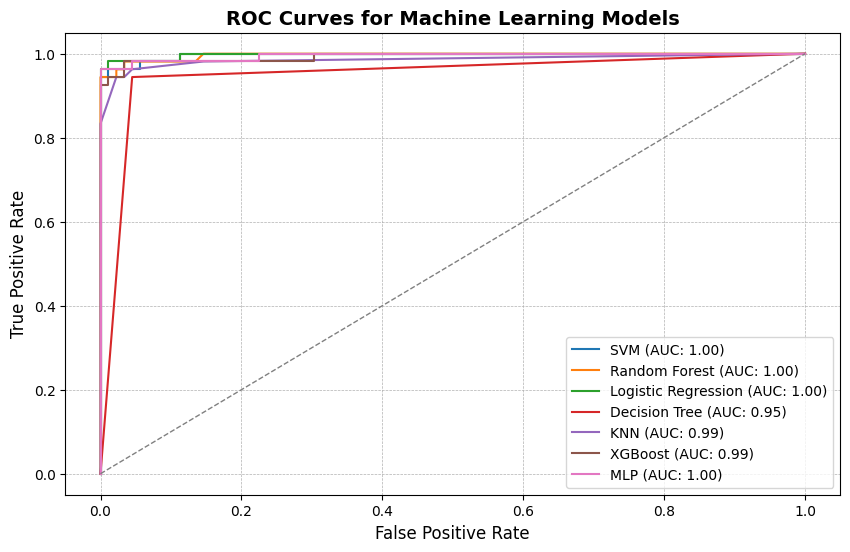

In [19]:
# Convert results to a structured table format
table_headers = ["Model", "Accuracy", "Precision", "Sensitivity", "F1 Score", "AUC"]
table_data = []

for name, metrics in results.items():
    table_data.append([
        name,
        f"{metrics['Accuracy']:.4f}",
        f"{metrics['Precision']:.4f}",
        f"{metrics['Sensitivity']:.4f}",
        f"{metrics['F1 Score']:.4f}",
        f"{metrics['AUC']:.4f}"
    ])

# Print the table with a formatted output
print("\n=== Machine Learning Model Performance Results ===\n")
print(tabulate(table_data, headers=table_headers, tablefmt="fancy_grid"))

# Print Confusion Matrices separately
print("\n=== Confusion Matrices ===\n")
for name, metrics in results.items():
    print(f"\n{name} Confusion Matrix:\n")
    print(tabulate(metrics["Confusion Matrix"], tablefmt="grid"))

# Improved ROC Curve plotting
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC: {results[name]['AUC']:.2f})")

plt.plot([0, 1], [0, 1], "k--", linewidth=1, linestyle="dashed", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curves for Machine Learning Models", fontsize=14, fontweight="bold")
plt.legend(fontsize=10, loc="lower right")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()